In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_colwidth", 200)
pd.set_option("display.max_row", 500)

In [2]:
def plot_scores(score_df, metric, score_type, title="", save_folder="", col_order=None, hue_order=None):

    g = sns.catplot(x="Domain", y="Score", hue="alpha", col="Data mul factor", col_order=col_order,
                    row="% Data", data=score_df, ci="sd", kind="bar", hue_order=hue_order,
                    row_order=[100.0, 80.0, 60.0, 40.0, 20.0])

    g.set_axis_labels("", "Score (Mean and Standard Deviation across 5 CV folds)")

    for i, ax in enumerate(g.fig.axes):
        ax.set_xticklabels(ax.get_xticklabels(), rotation=65)
        ax.axhline(0, color="black")

    g.fig.suptitle(title, y=1.08, fontsize=30)
    
    if metric == "R2" and score_type == "Out-of-sample":
        g.set(ylim=(-1, 0.2))
#         pass
        
    if metric == "R2" and (score_type == "In-sample" or score_type == "In-sample (original)"):
        g.set(ylim=(-0.05, 1.0))
        
    if metric == "MAE":
        g.set(ylim=(0.0, 1.6))
        
    plt.show()
#     plt.savefig(save_folder + title, bbox_inches="tight")


def plot_all_scores(score_df, title_prefix="", save_folder="", col_order=None, hue_order=None):   

    for metric in score_df["Metric"].unique():

        for score_type in score_df["Score type"].unique():
            
            for model in score_df["Model"].unique():

                filtered_data = score_df[(score_df["Metric"] == metric) & (score_df["Score type"] == score_type) 
                                         & (score_df["Model"] == model)]

                title = title_prefix + metric + " - " + score_type + " - " + model

                plot_scores(filtered_data, metric, score_type, title, save_folder, col_order=col_order, hue_order=hue_order)

## 1- Ridge

In [124]:
# scores_ridge_all = pd.read_hdf('results/singleoutput/results_pca_100_singleoutput_mixup_ridge_all.h5', key='p', mode='r')
# bp_ridge_all = pd.read_hdf('results/singleoutput/best_params_pca_100_singleoutput_mixup_ridge_all.h5', key='p', mode='r')

scores_ridge_all.to_hdf('results/singleoutput/with-shuffle/results_pca_100_singleoutput_mixup_ridge_all.h5', key='p', mode='w')
bp_ridge_all.to_hdf('results/singleoutput/with-shuffle/best_params_pca_100_singleoutput_mixup_ridge_all.h5', key='p', mode='w')

In [121]:
scores_ridge_all = pd.concat([scores_ridge_all, rid01_, rid02_, rid03_, rid04_, rid05_, rid01__, rid02__, rid03__, rid04__, rid05__], ignore_index=True)
bp_ridge_all = pd.concat([bp_ridge_all, brid01, brid01_, brid02_, brid03_, brid04_, brid05_, brid01__, brid02__, brid03__, brid04__, brid05__], ignore_index=True)


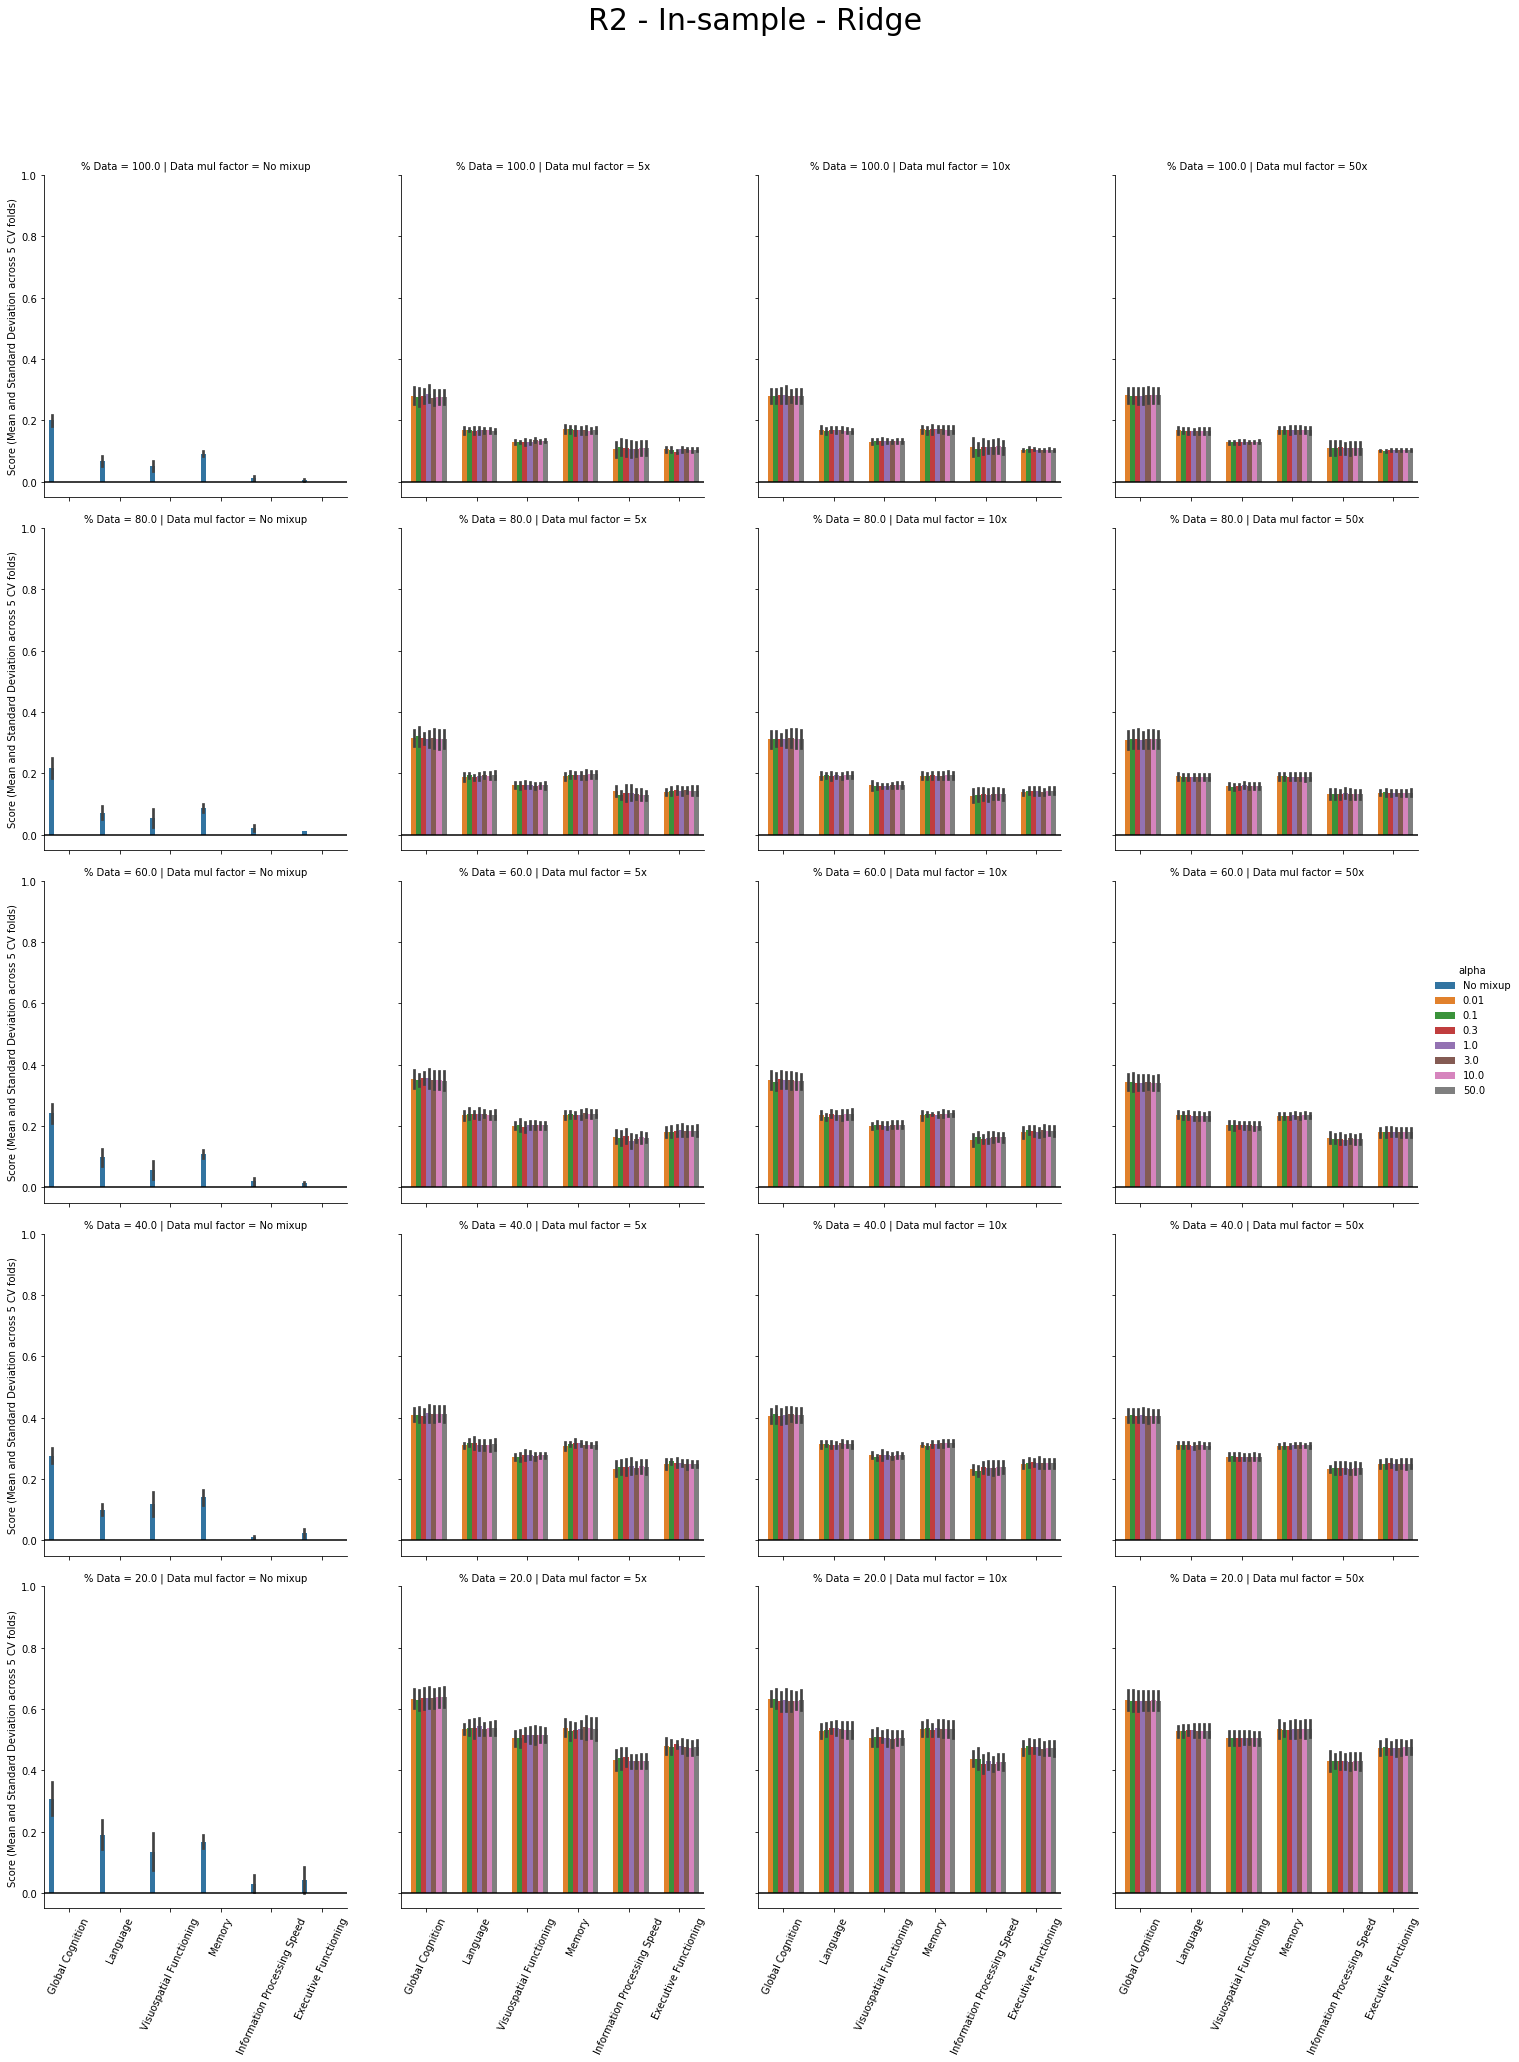

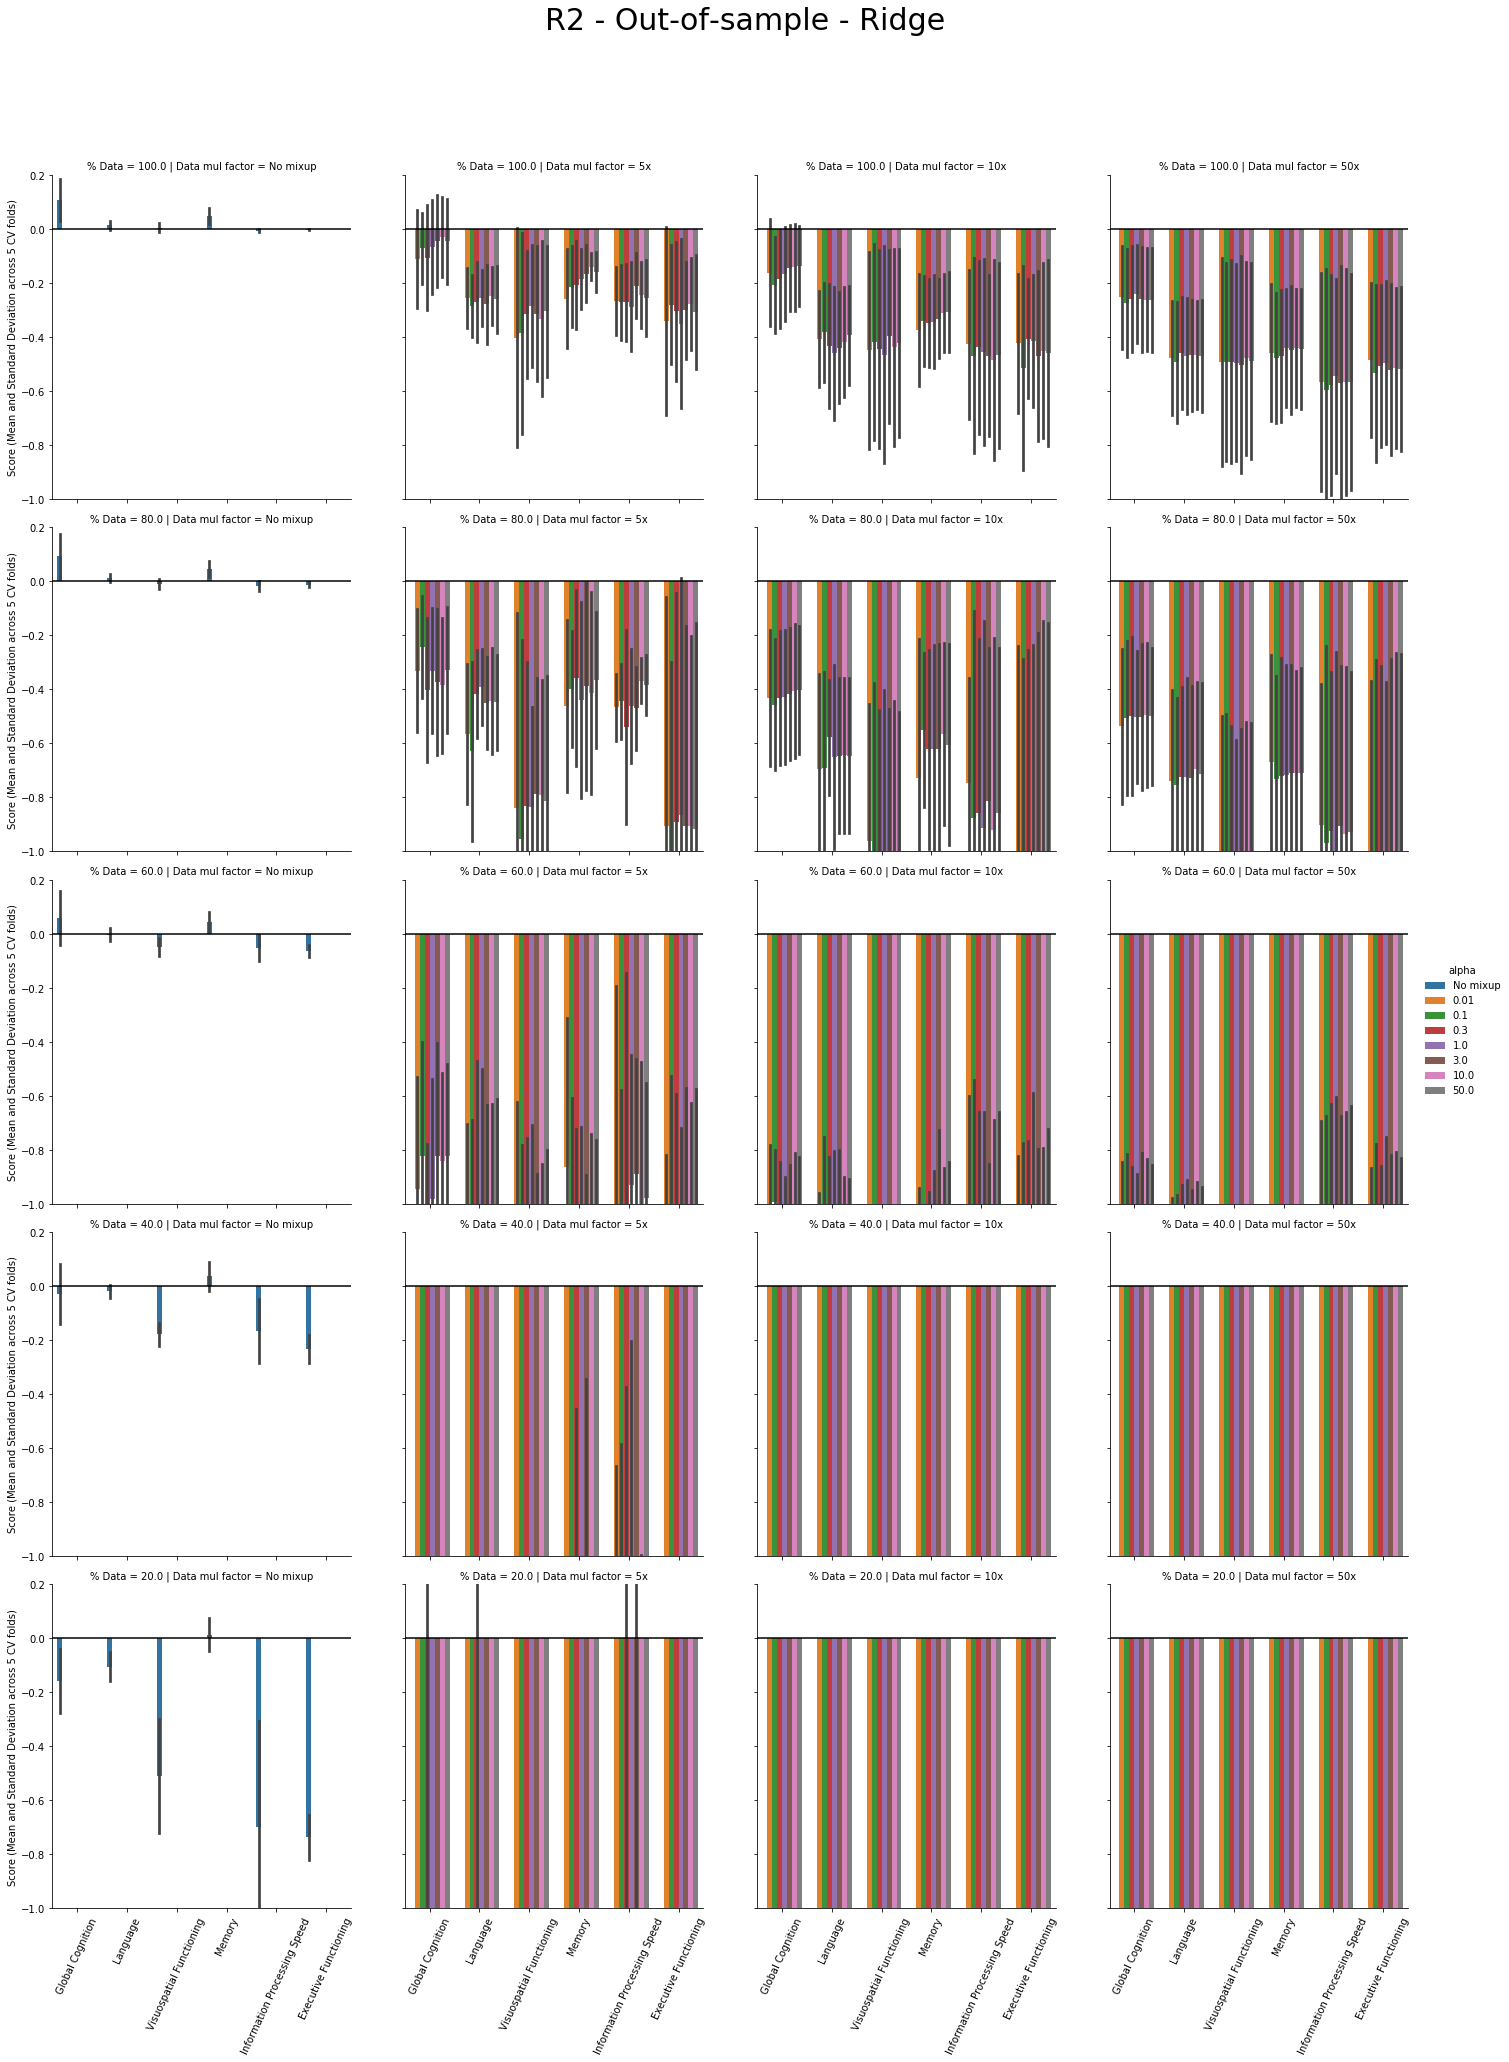

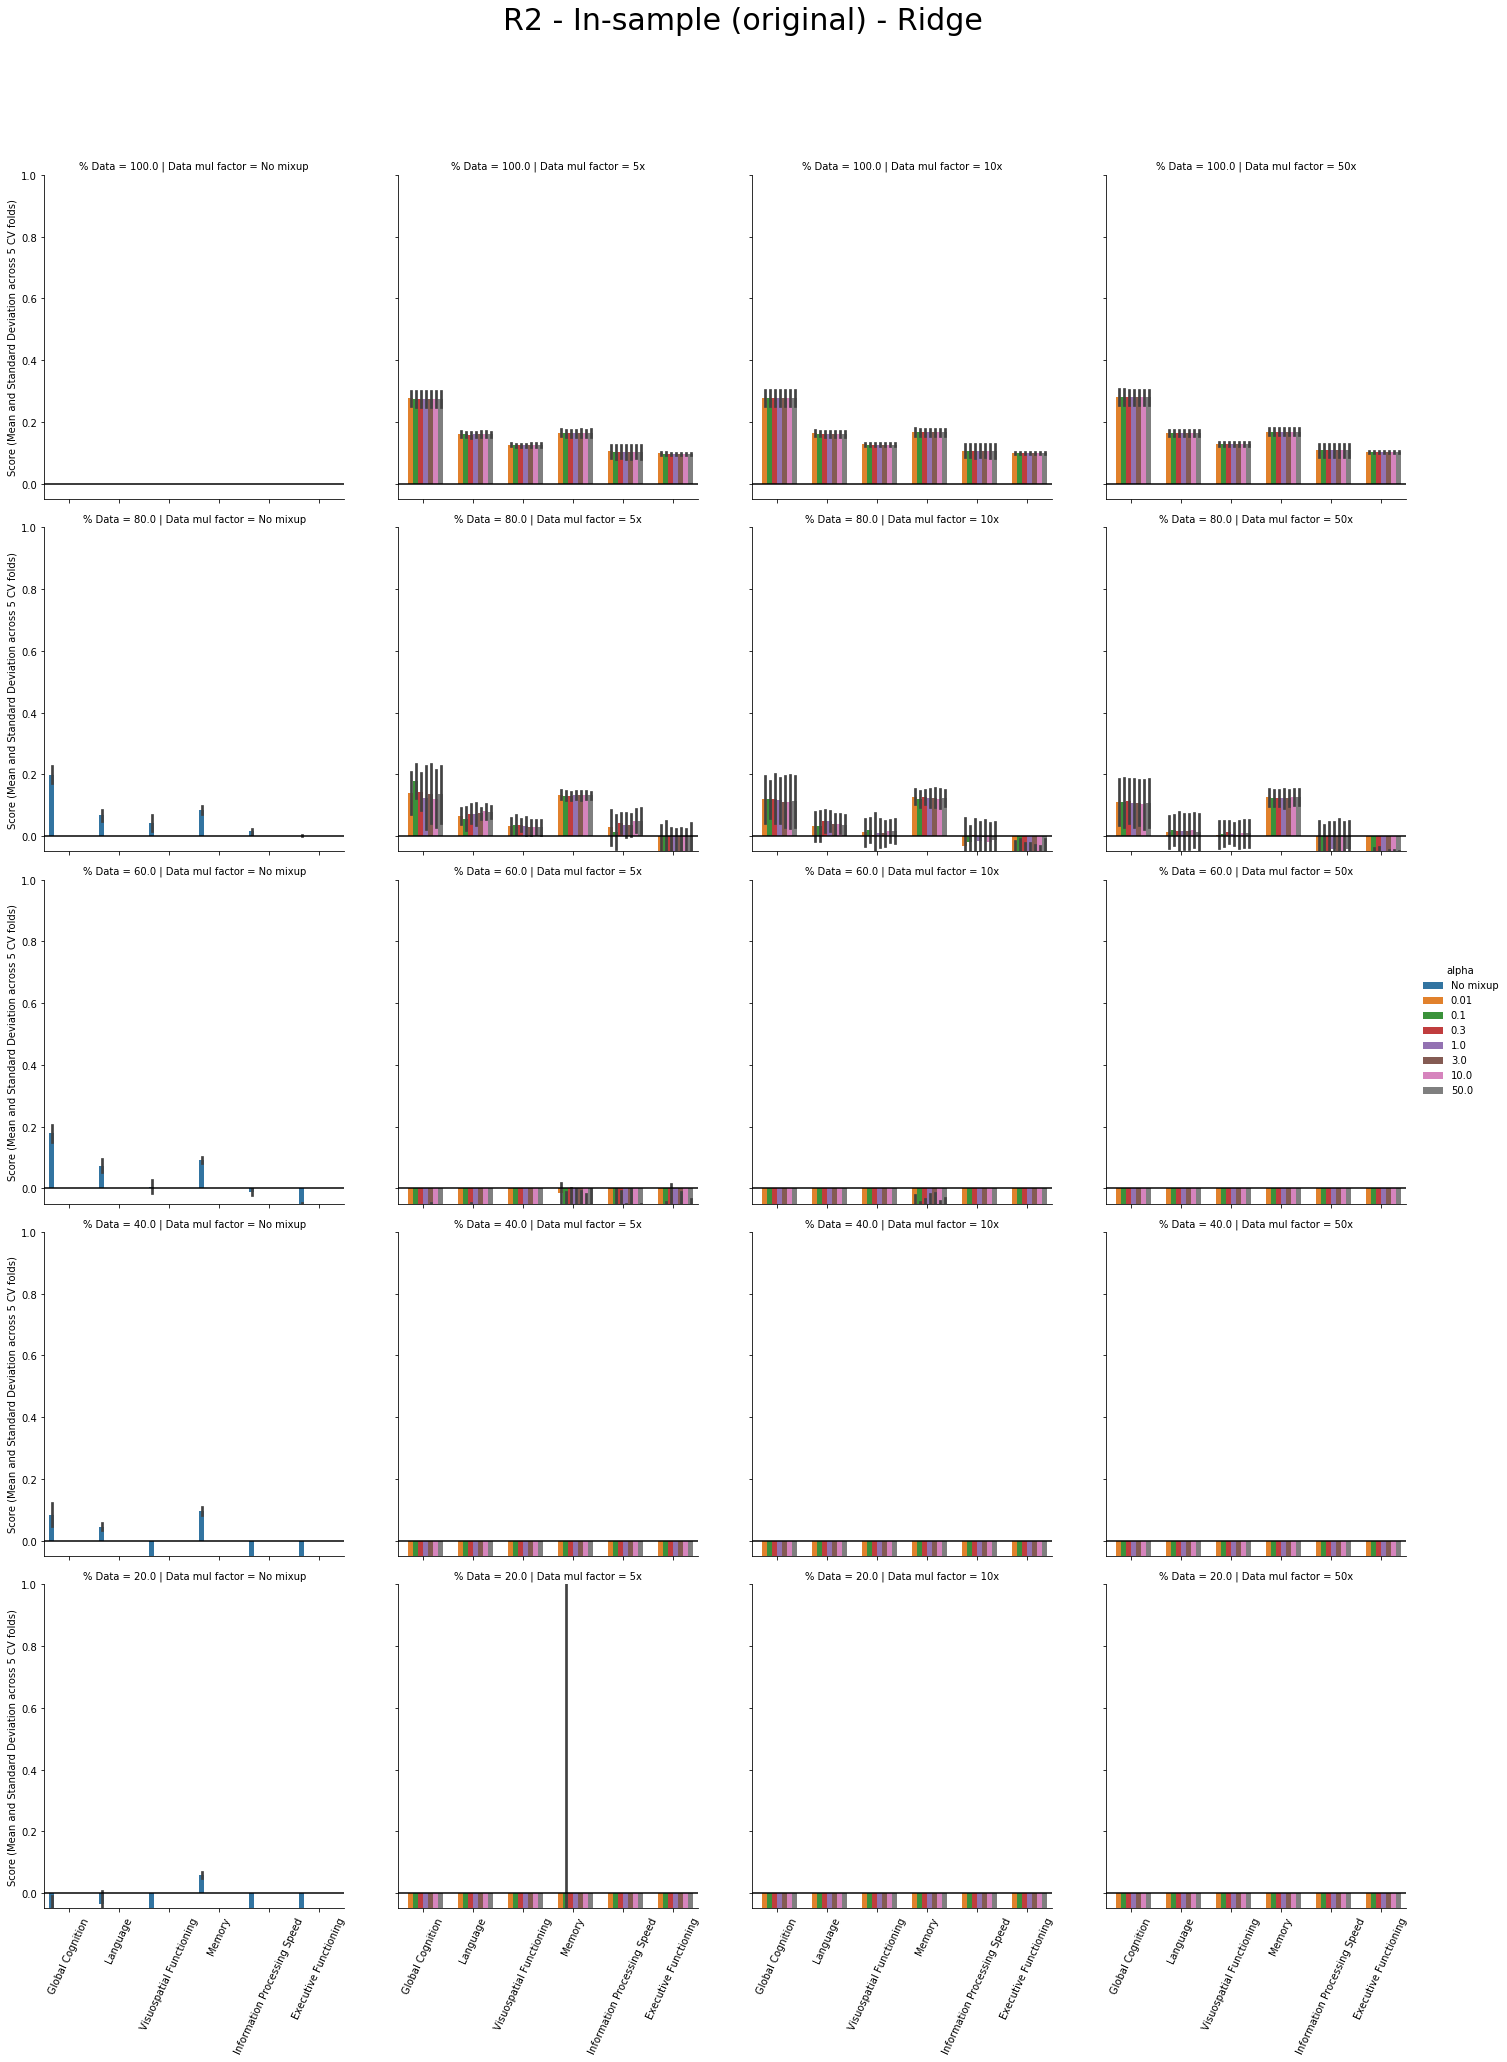

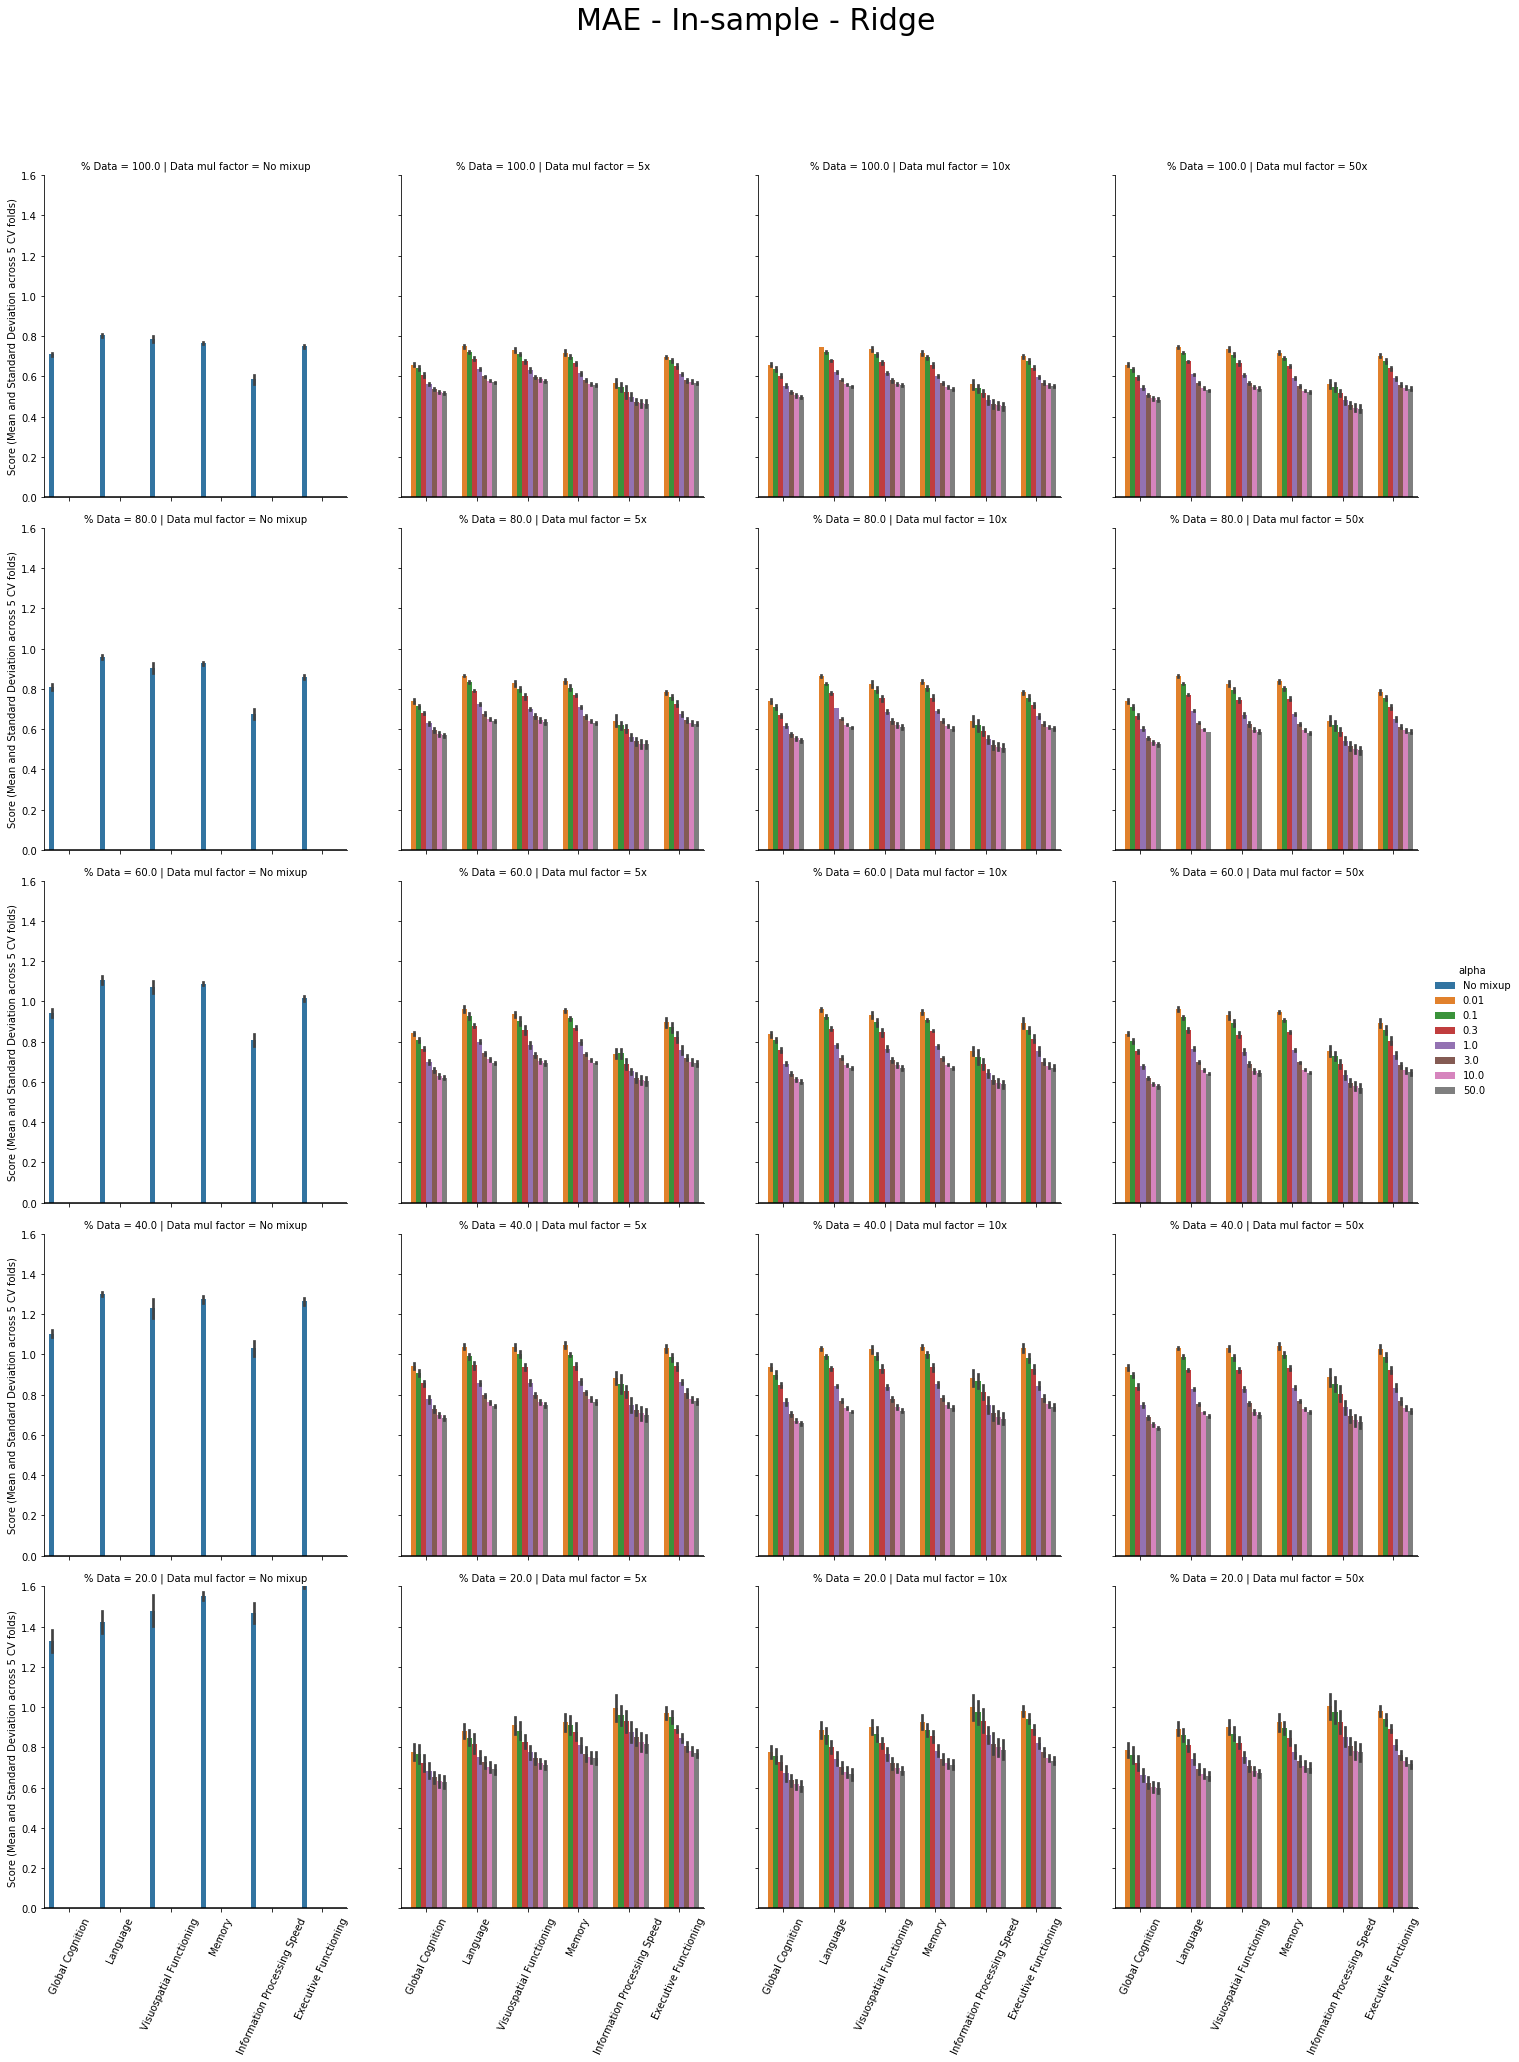

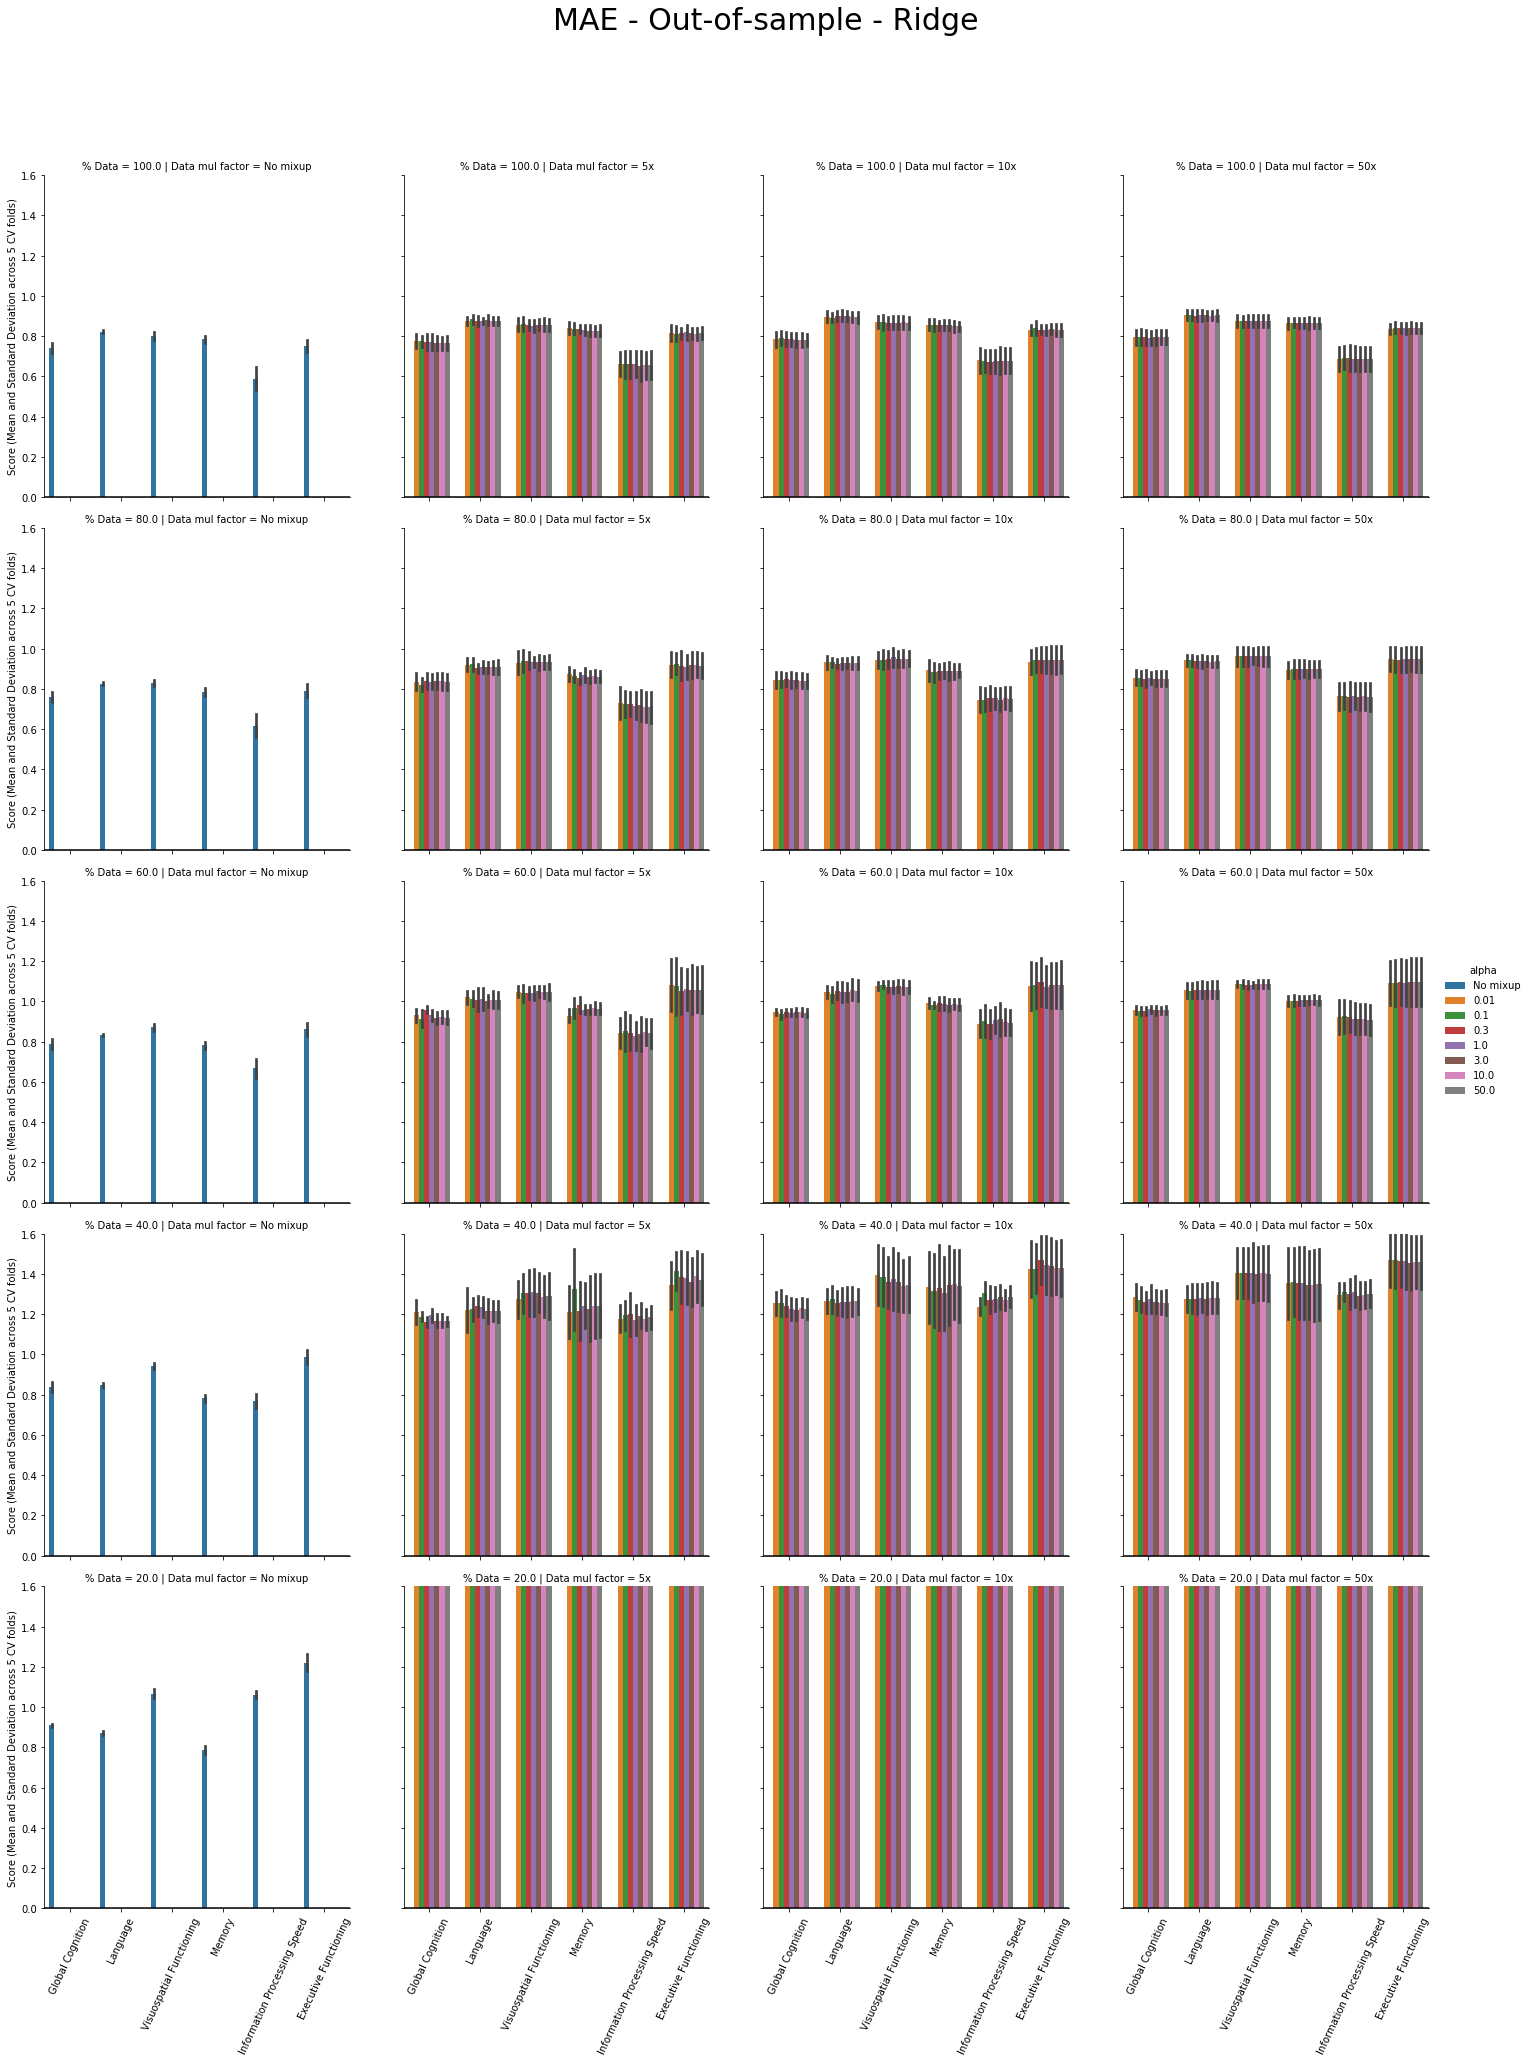

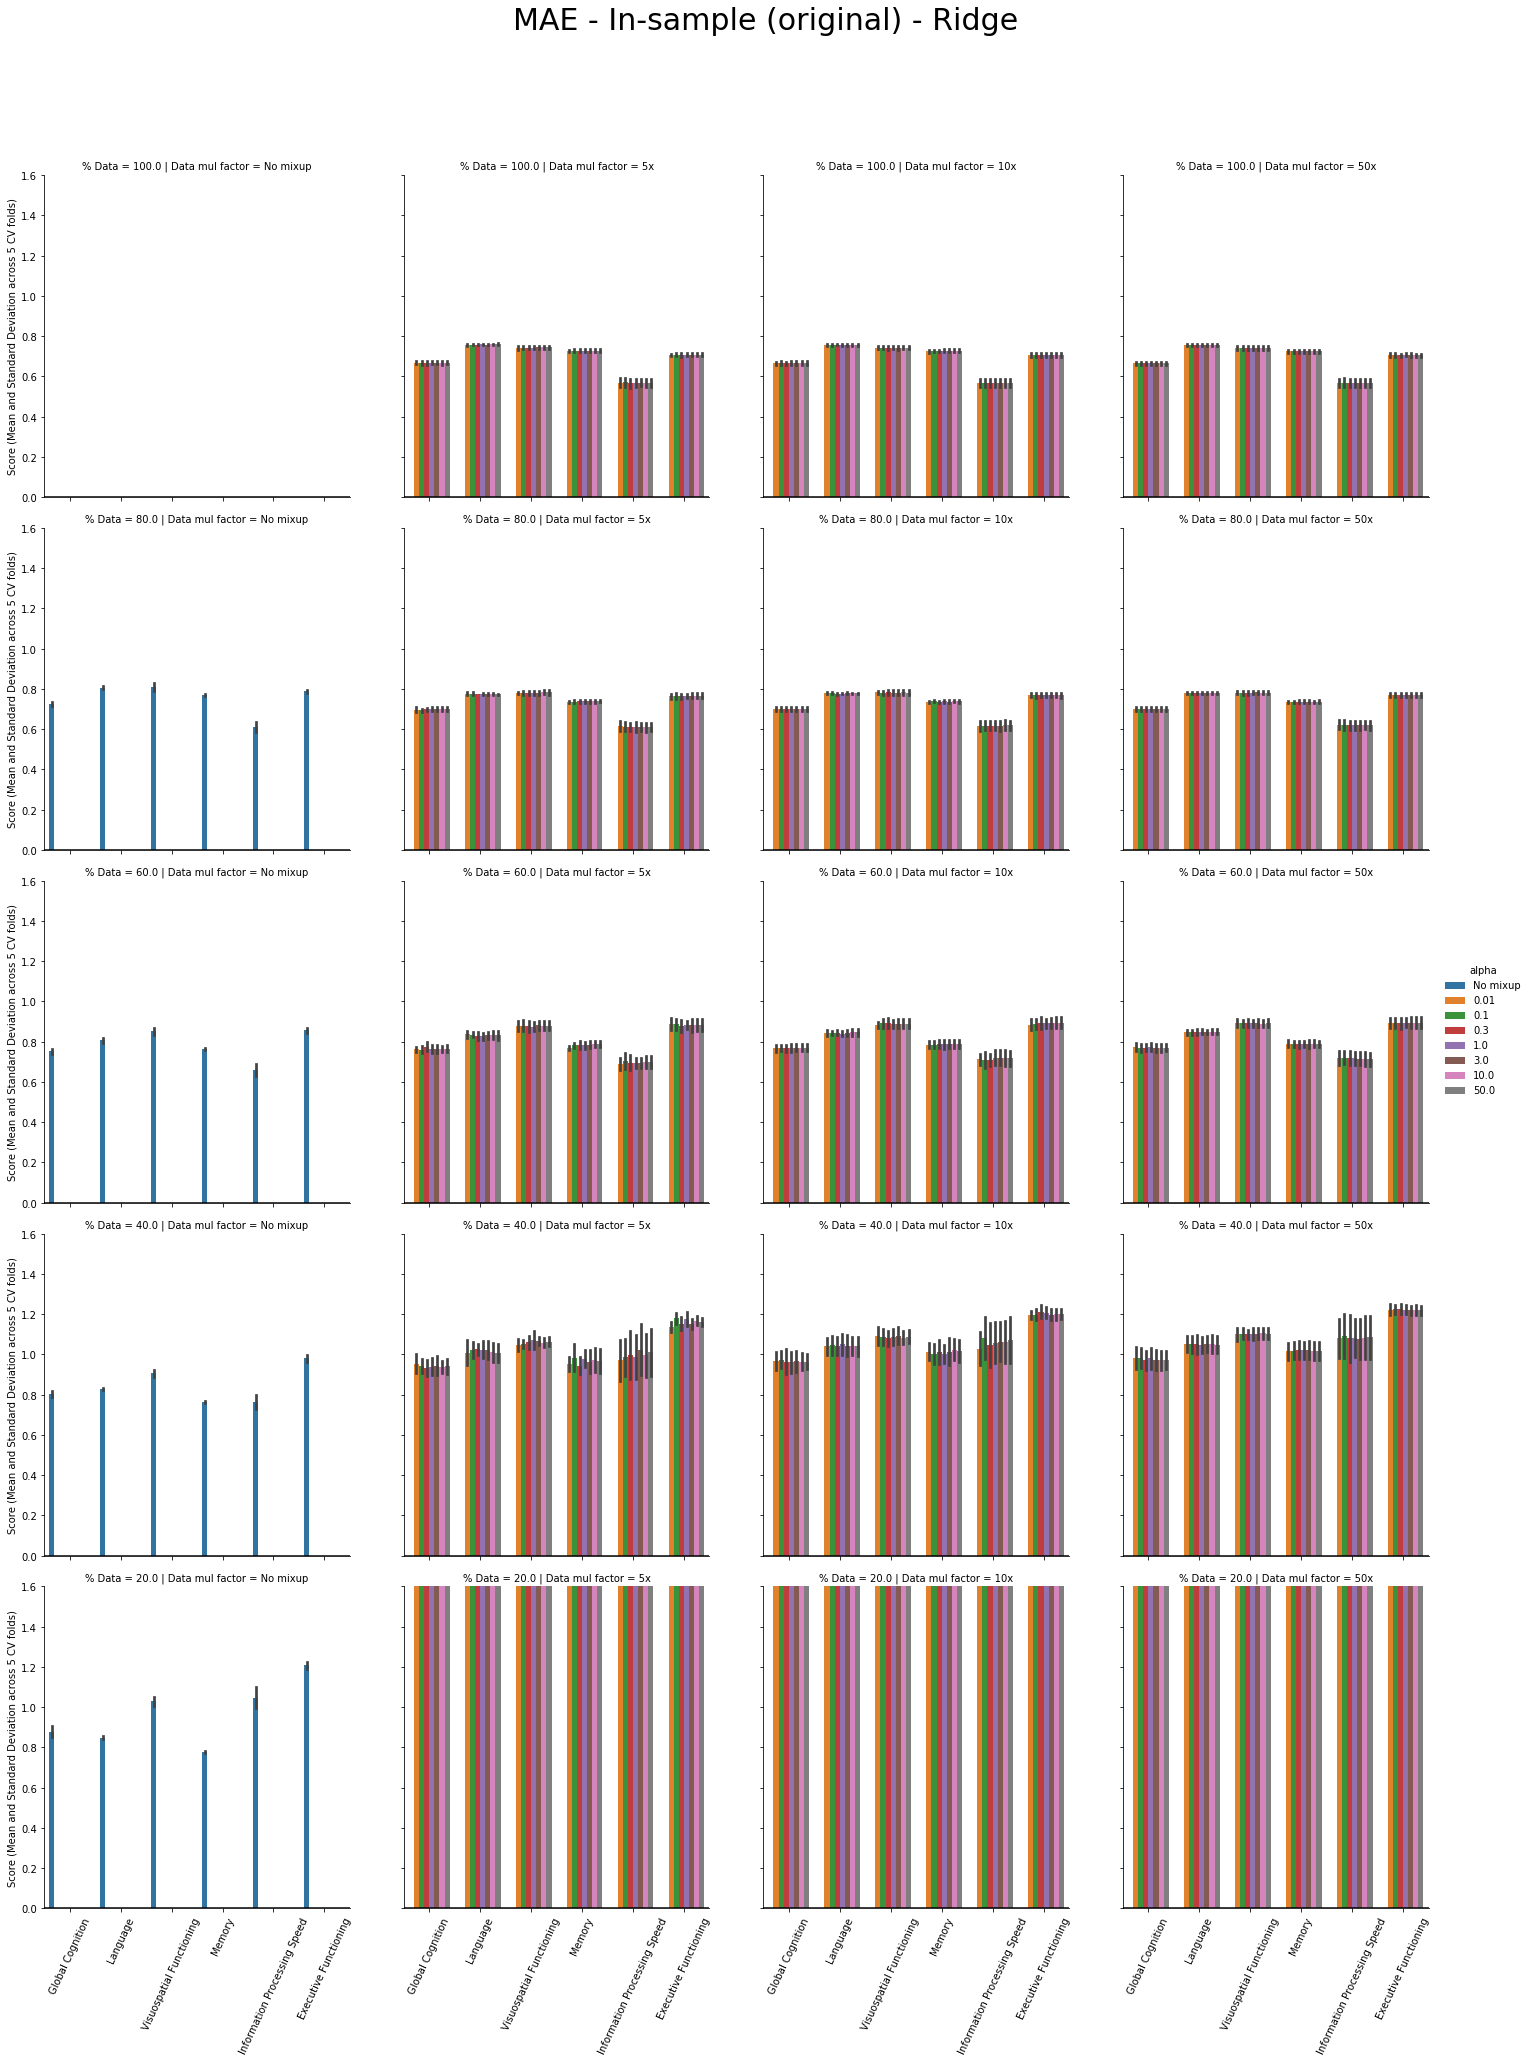

In [123]:
plot_all_scores(scores_ridge_all, col_order=["No mixup", "5x", "10x", "50x"], hue_order=["No mixup", 0.01, 0.1, 0.3, 1.0, 3.0, 10.0, 50.0])

## 2- Random Forest

In [4]:
scores_rf_all = pd.read_hdf('results/singleoutput/with-shuffle/results_pca_100_singleoutput_mixup_rf_all.h5', key='p', mode='r')
bp_rf_all = pd.read_hdf('results/singleoutput/with-shuffle/best_params_pca_100_singleoutput_mixup_rf_all.h5', key='p', mode='r')

# scores_rf_all.to_hdf('results/singleoutput/with-shuffle/results_pca_100_singleoutput_mixup_rf_all.h5', key='p', mode='w')
# bp_rf_all.to_hdf('results/singleoutput/with-shuffle/best_params_pca_100_singleoutput_mixup_rf_all.h5', key='p', mode='w')

In [5]:
rf03_5x10x_1 = pd.read_hdf('results_remote/new-kfold-5x-10x-1regression-singleoutput-pc100-mixup-rf-0.3.h5', key='p', mode='r')
rf02_5x10x_3_4 = pd.read_hdf('results_remote/new-kfold-5x-10x-3-4-regression-singleoutput-pc100-mixup-rf-0.2.h5', key='p', mode='r')
rf04_10x_1 = pd.read_hdf('results_remote/new-kfold-10x-1-regression-singleoutput-pc100-mixup-rf-0.4.h5', key='p', mode='r')
rf01 = pd.read_hdf('results_remote/new-kfold-nm-regression-singleoutput-pc100-mixup-rf-0.1.h5', key='p', mode='r')

brf03_5x10x_1 = pd.read_hdf('results_remote/new-kfold-5x-10x-1best-params-regression-singleoutput-pc100-mixup-rf-0.3.h5', key='p', mode='r')
brf02_5x10x_3_4 = pd.read_hdf('results_remote/new-kfold-5x-10x-3-4-best-params-regression-singleoutput-pc100-mixup-rf-0.2.h5', key='p', mode='r')
brf04_10x_1 = pd.read_hdf('results_remote/new-kfold-10x-1-best-params-regression-singleoutput-pc100-mixup-rf-0.4.h5', key='p', mode='r')
brf01 = pd.read_hdf('results_remote/new-kfold-nm-best-params-regression-singleoutput-pc100-mixup-rf-0.1.h5', key='p', mode='r')


In [ ]:
scores_rf_all = pd.concat([scores_rf_all, rid05], ignore_index=True)
bp_rf_all = pd.concat([bp_rf_all, brid05], ignore_index=True)

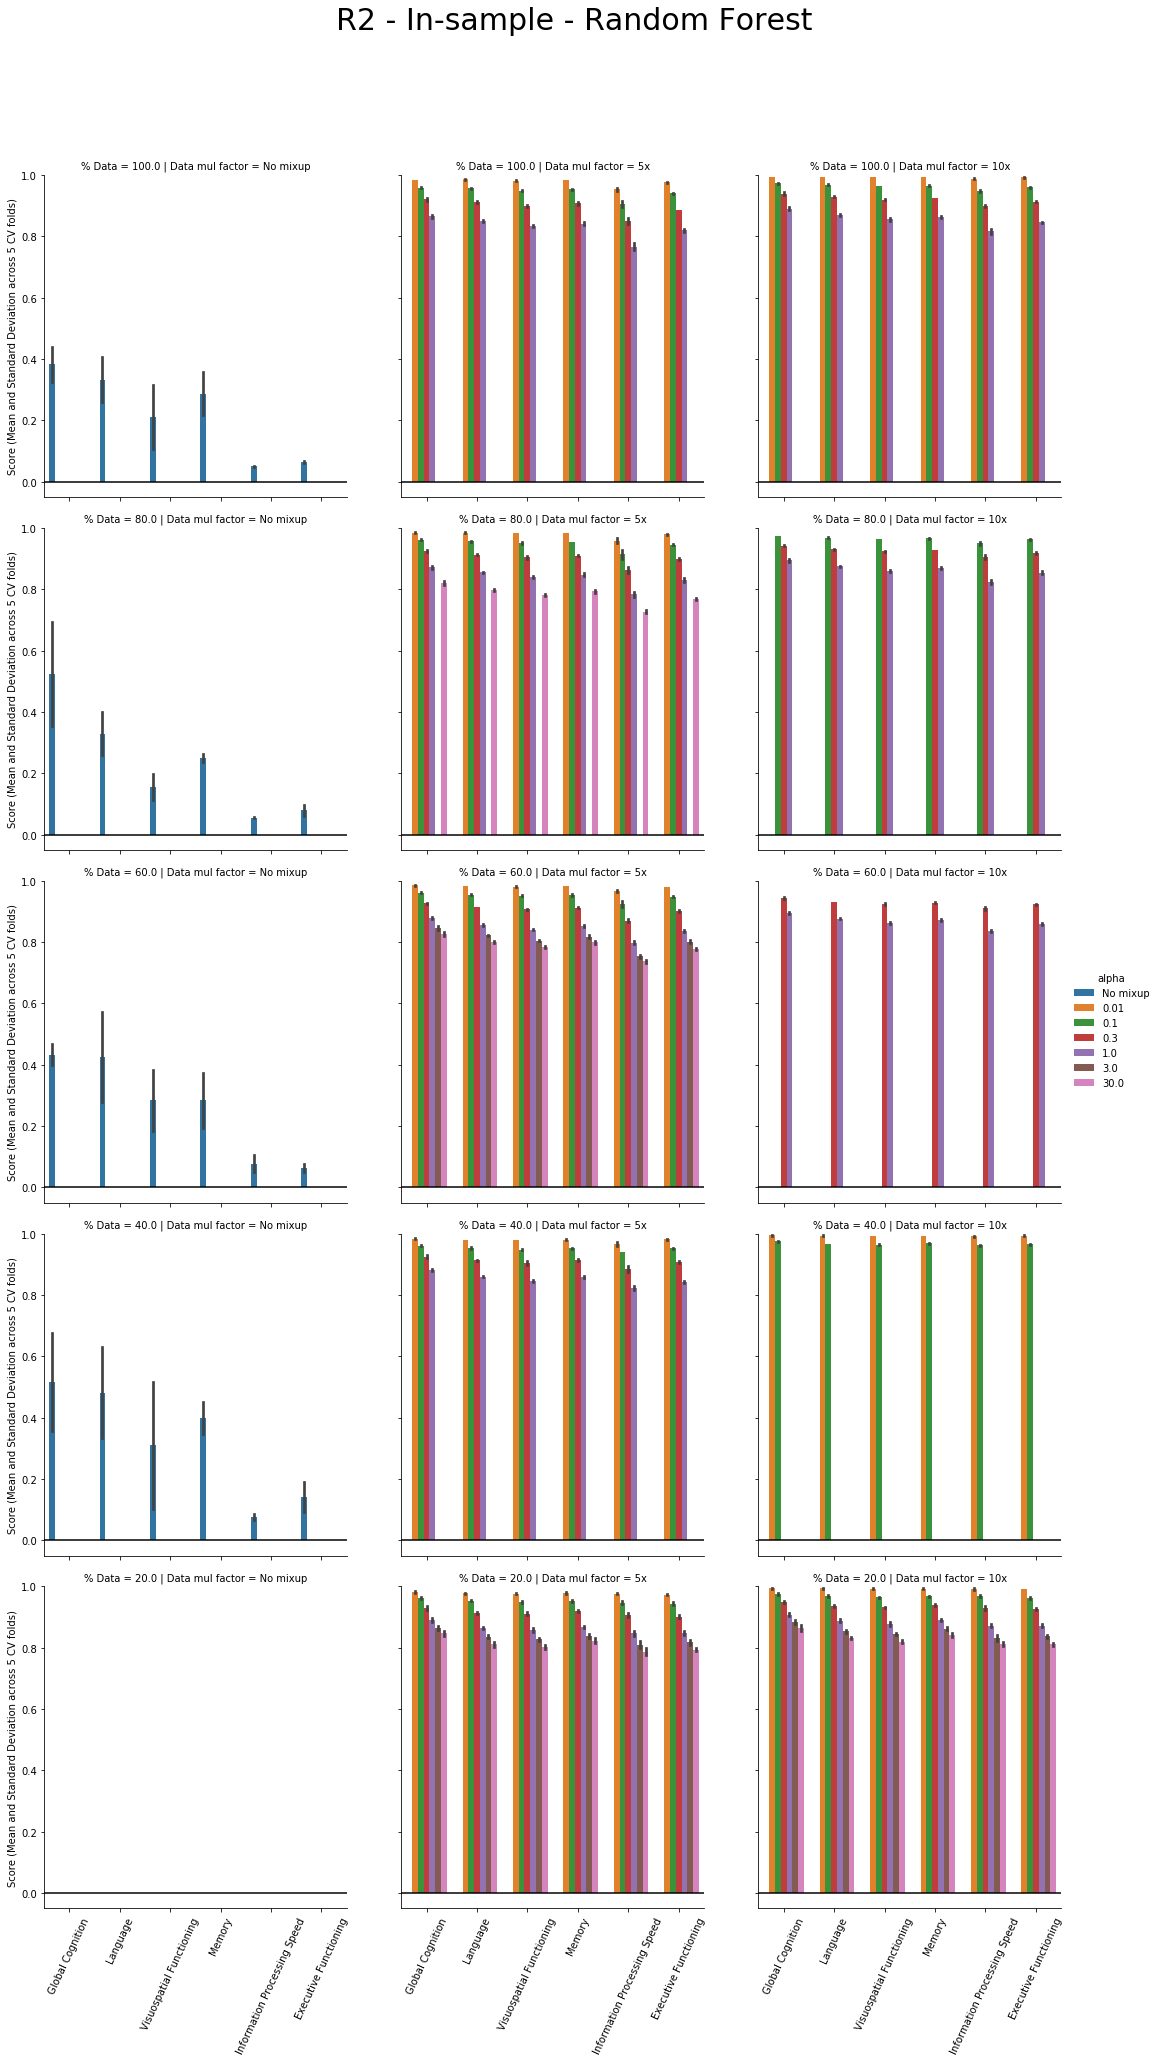

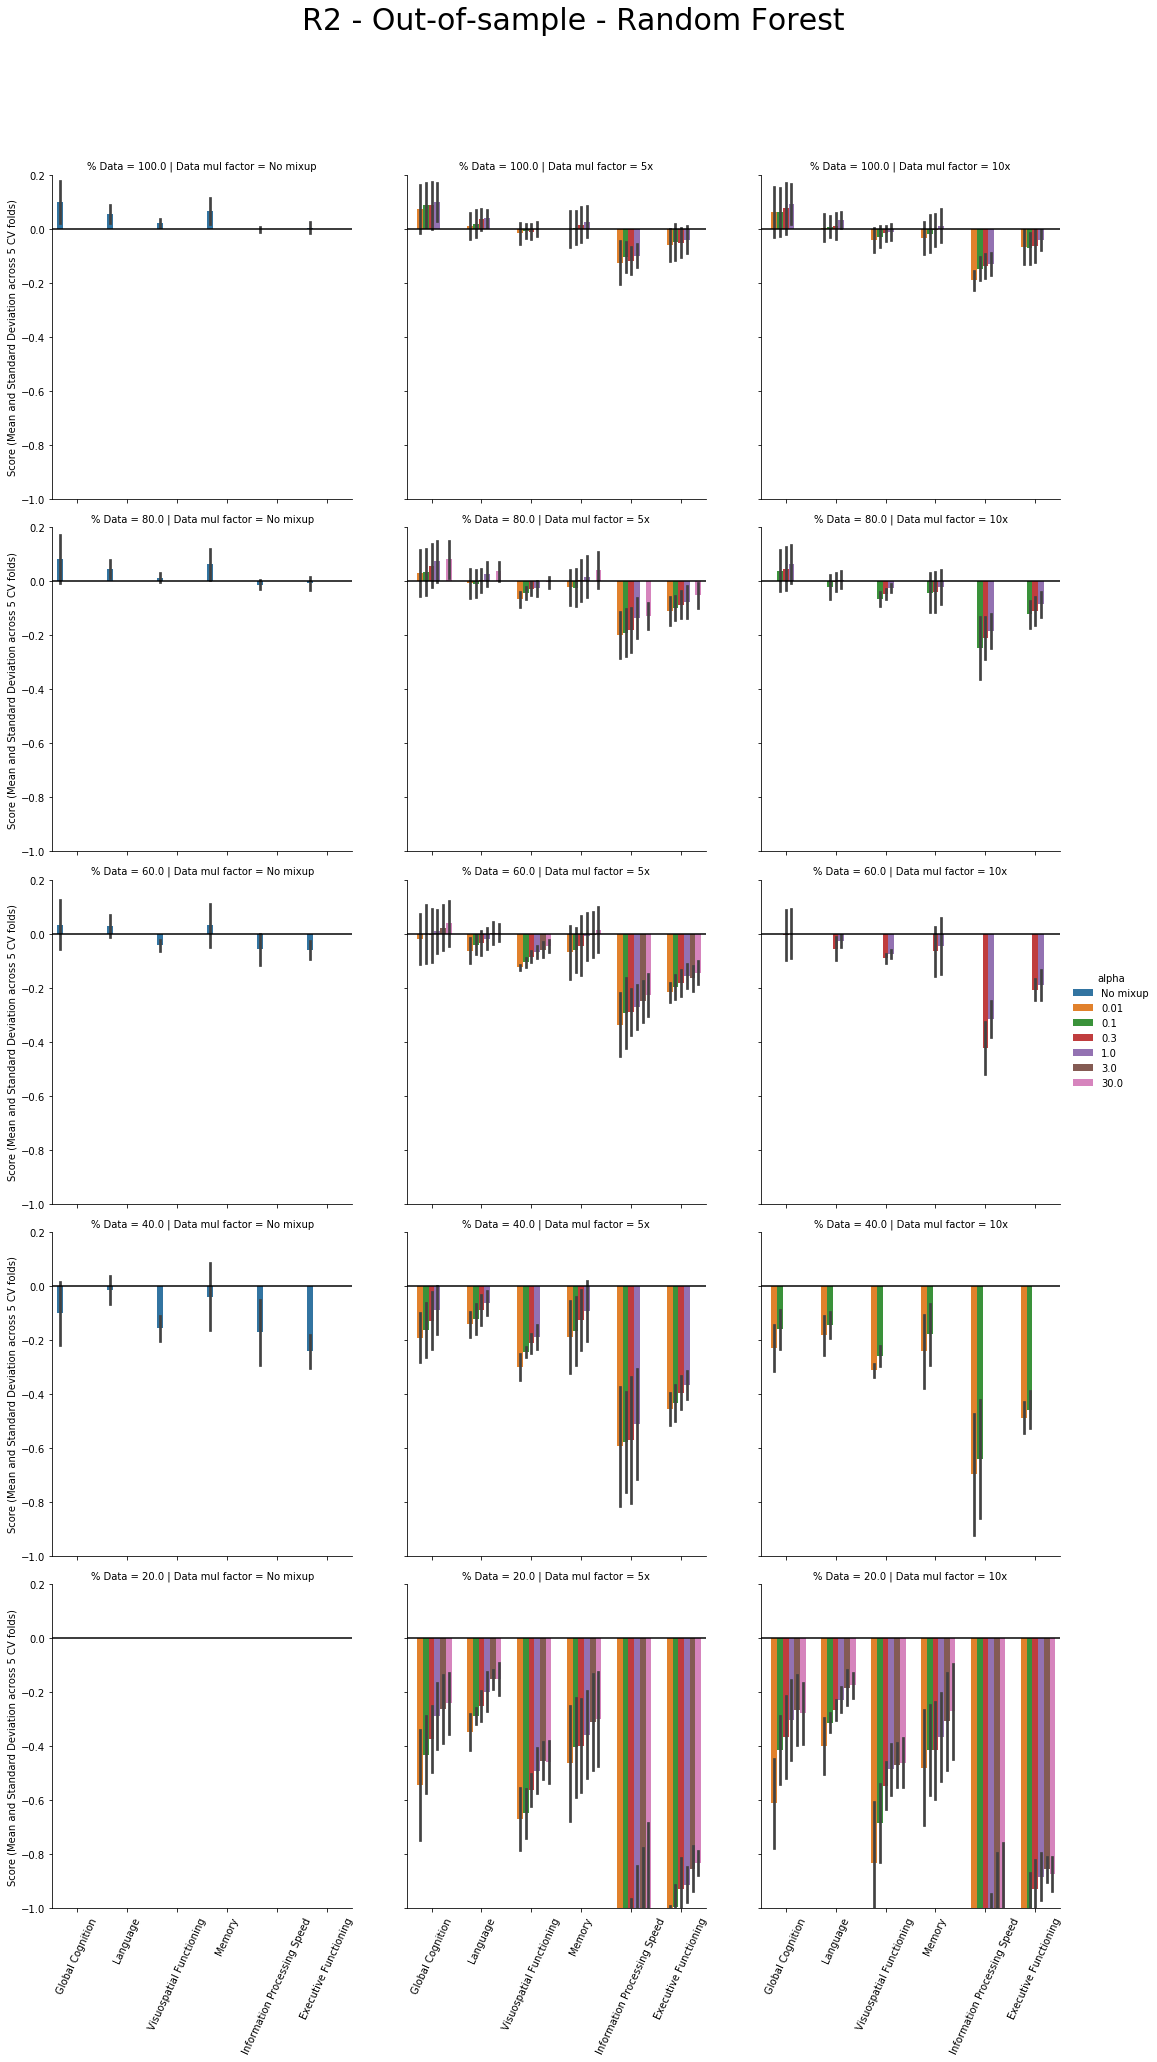

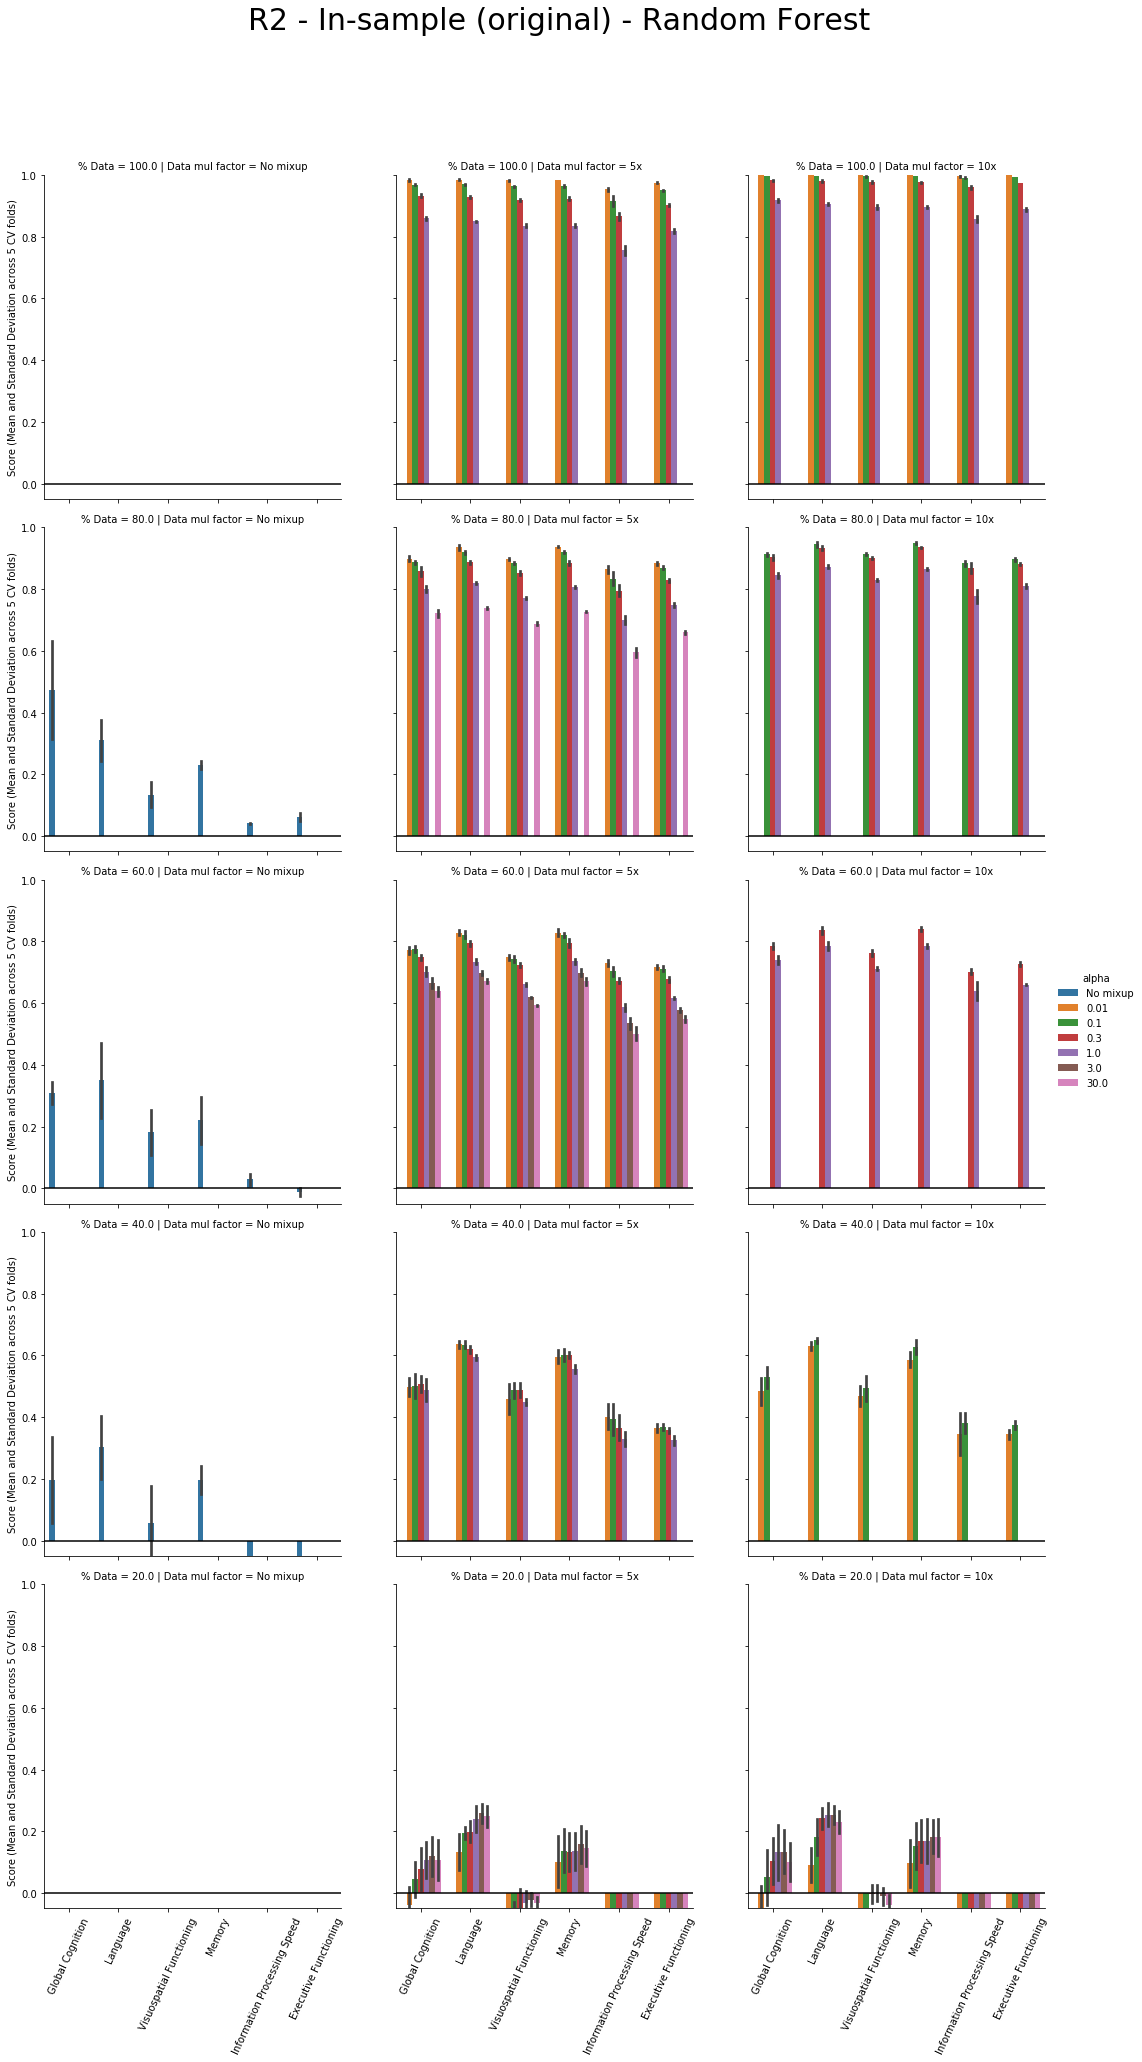

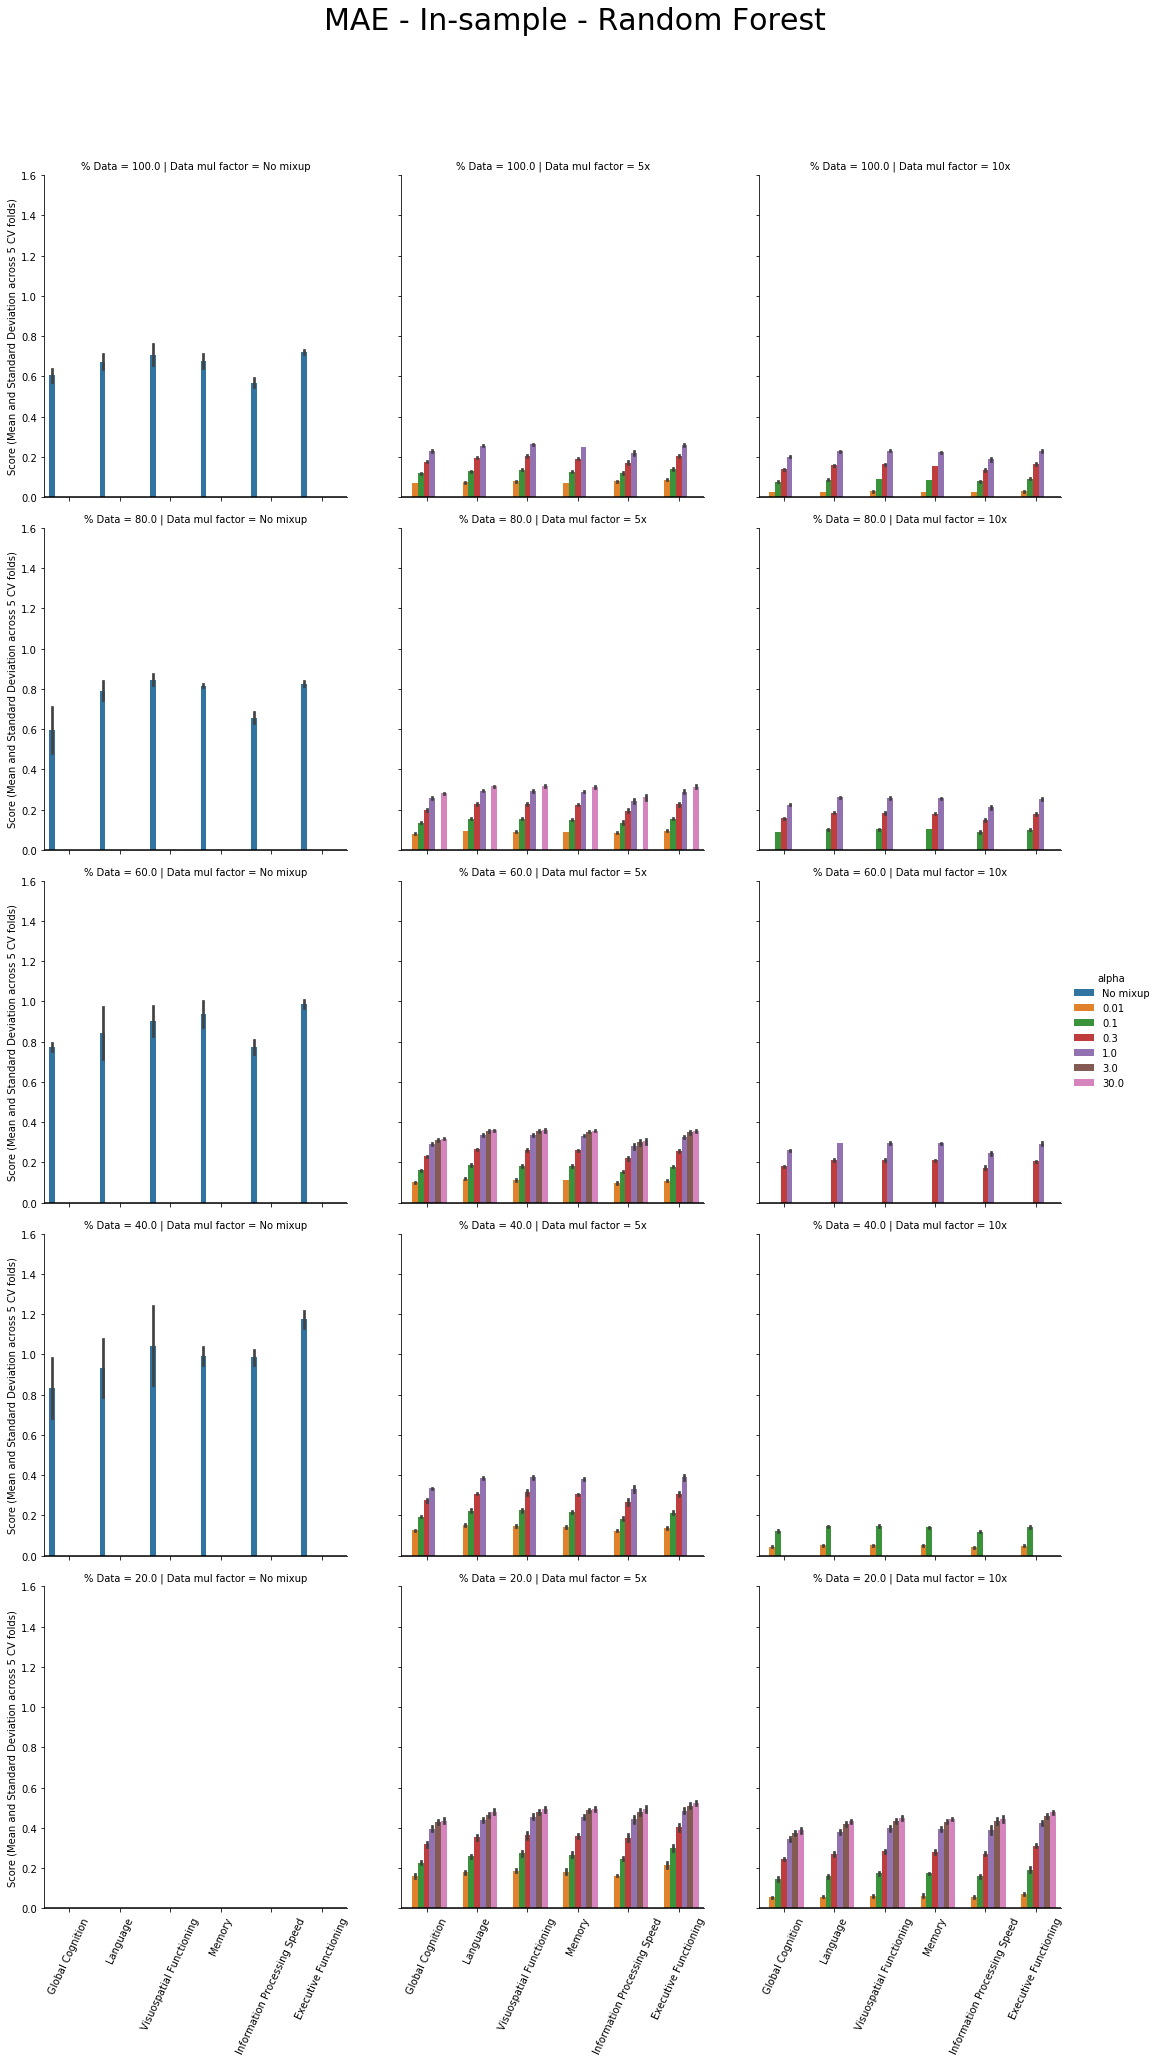

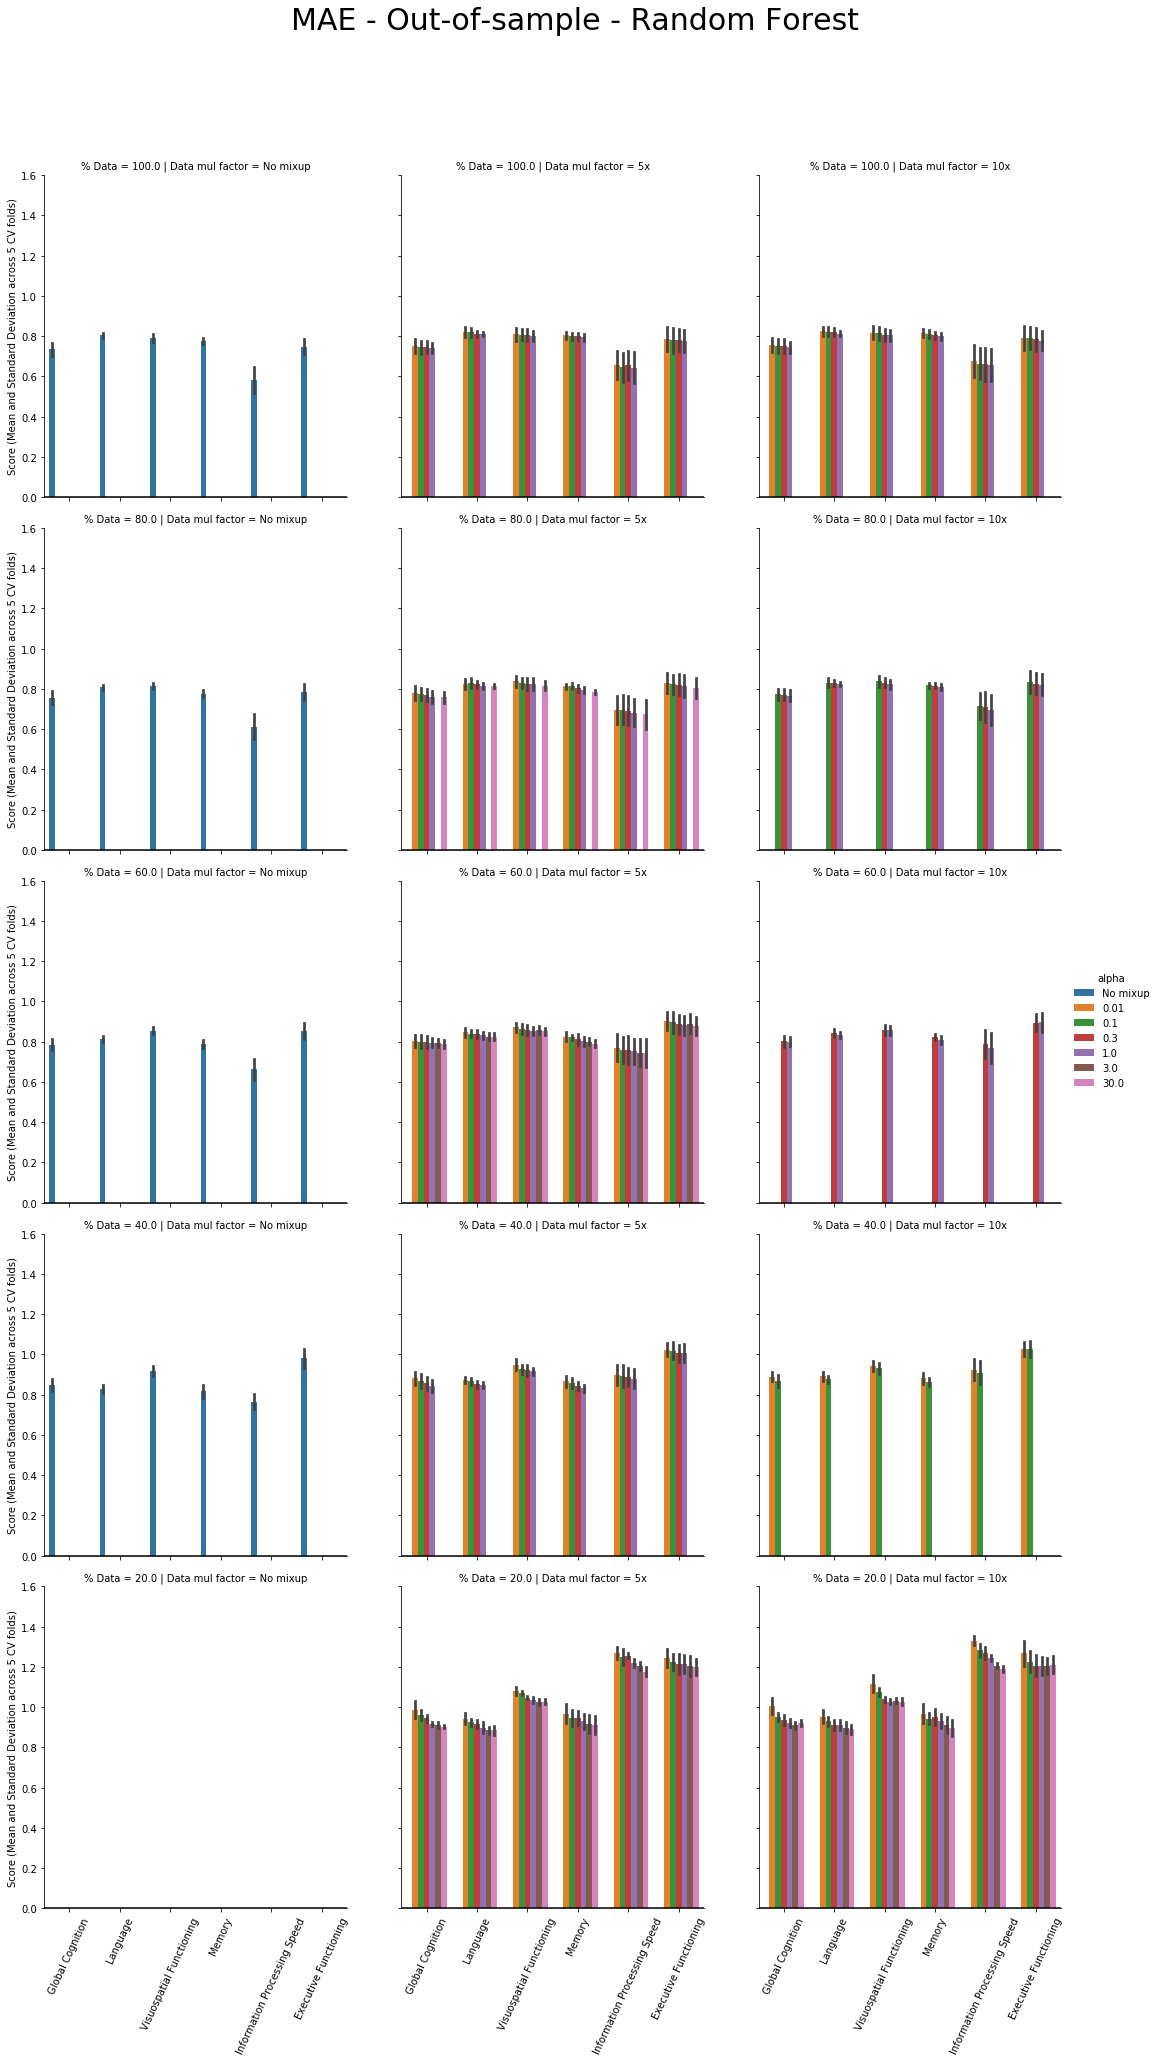

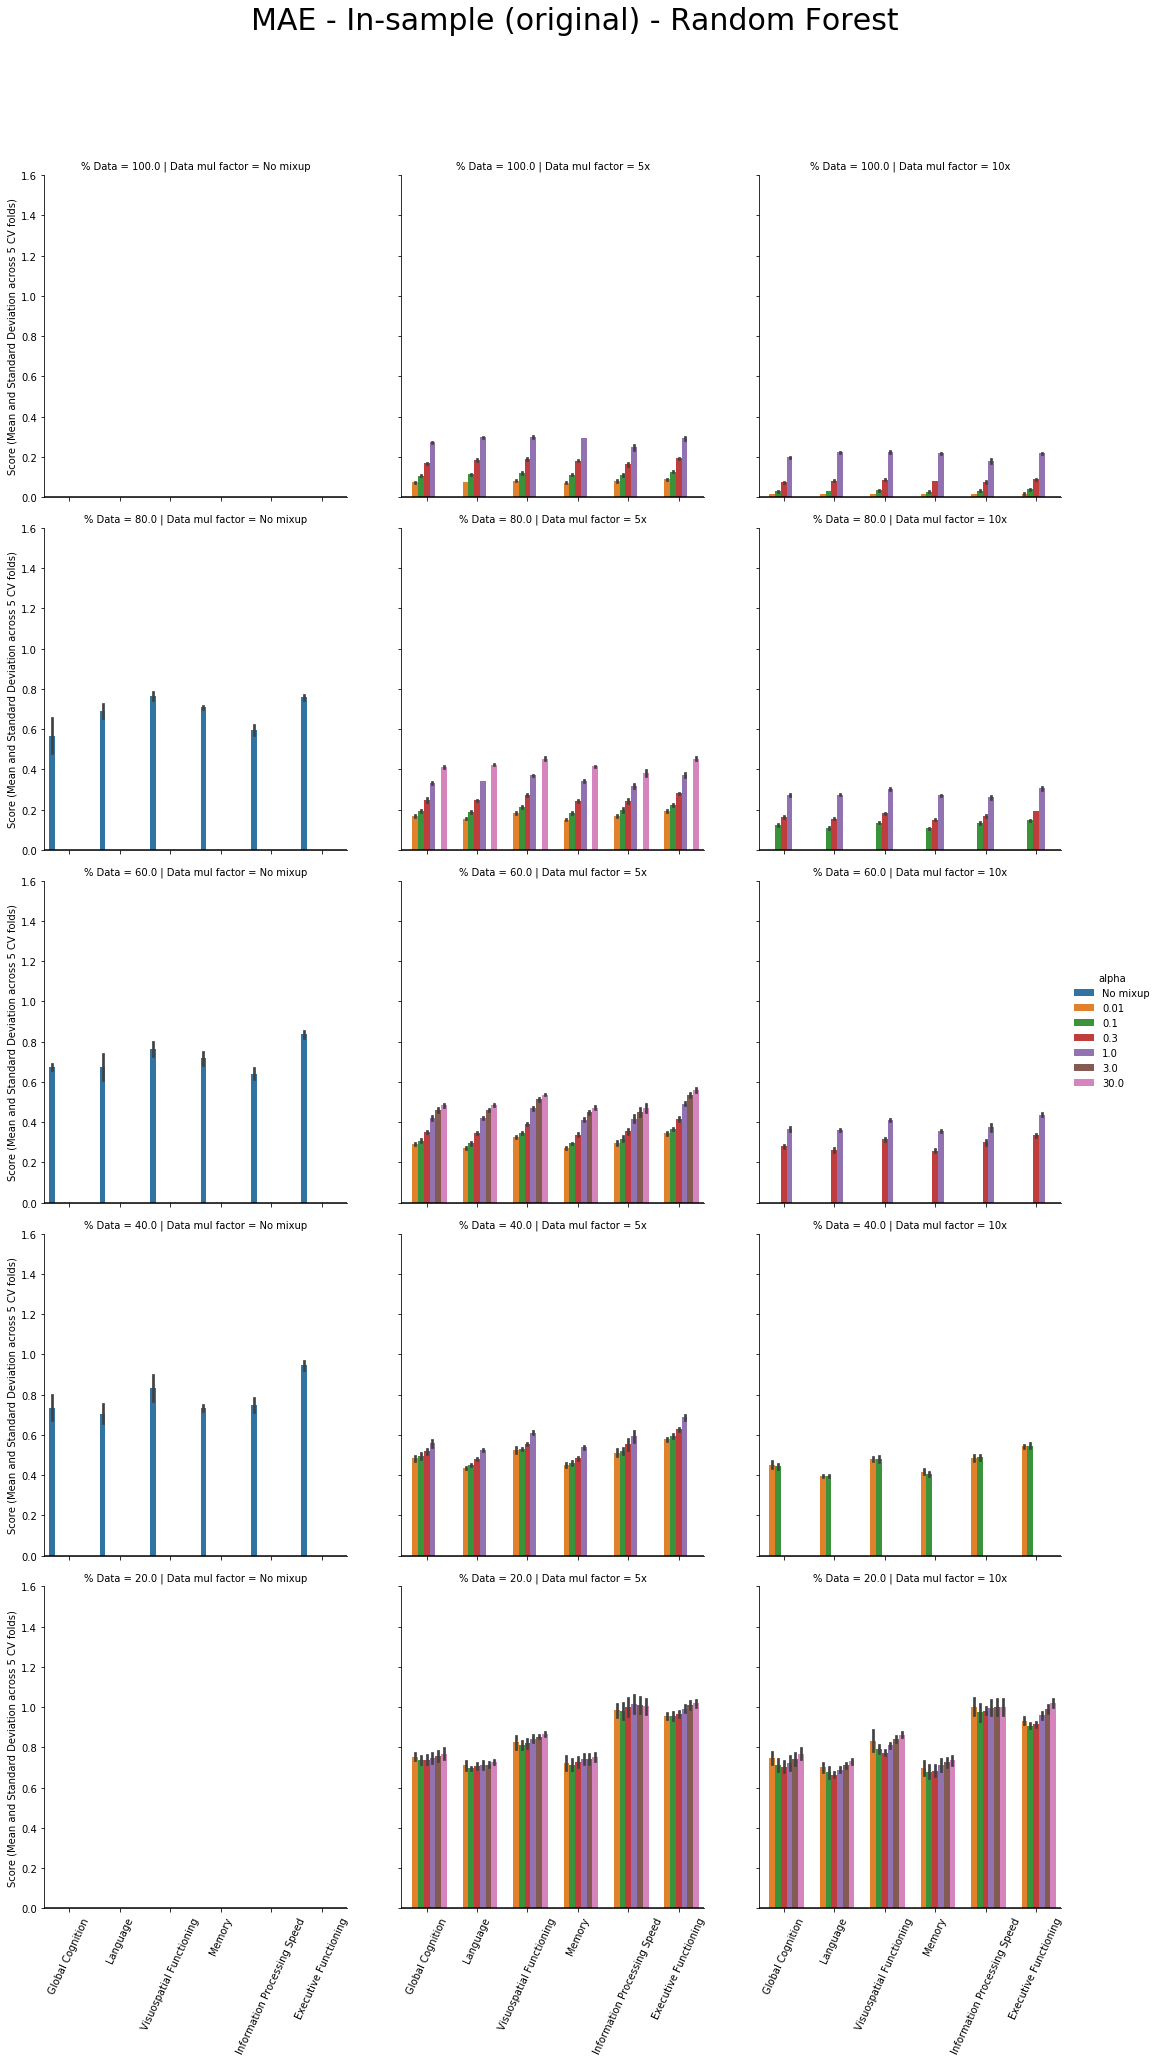

In [152]:
plot_all_scores(scores_rf_all)